In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [20]:
def width2var(w):
    var = (w/2)**2
    return var

In [21]:
# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (8))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 450, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (15))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'


In [22]:
data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(data.shape)
print(data)
print(locs)
print(rents)

(53, 3)
[[ 91.74499024 609.74580369  24.31458736]
 [118.86562587 485.62879828  24.3966571 ]
 [133.19342384 533.26127295  22.90658506]
 [156.37657718 641.49678185  28.24675035]
 [ 69.28890102 417.91997913  21.22607637]
 [210.47513383 464.02694044  27.40953251]
 [ 69.16684287 463.49125037  22.58948844]
 [107.01205646 599.78463501  27.10311939]
 [484.13214    434.43458714  37.51323516]
 [483.75037489 548.83251588  31.74389067]
 [560.40444581 463.22111129  35.63569011]
 [590.46594787 469.59996619  30.4842477 ]
 [445.27949583 397.61857339  31.82657578]
 [462.42720021 574.55848709  37.25962563]
 [473.50810171 353.71837386  33.47805826]
 [459.41692065 412.79223133  34.12686831]
 [455.40157237 474.49125109  30.38496923]
 [611.76521983 373.59674104  37.03140683]
 [484.03455665 511.56330896  35.20930594]
 [455.08301743 400.53512183  30.25370833]
 [483.78138031 480.33017248  37.21889246]
 [463.93409538 509.44362207  38.54582354]
 [527.67276386 491.44417787  33.77753147]
 [392.11925449 154.3021927

(874, 620, 3)


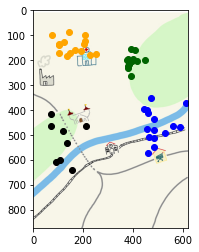

In [23]:
img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

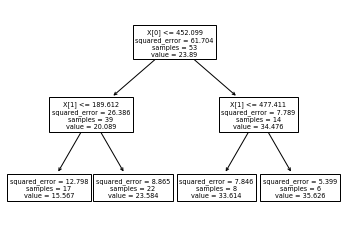

In [25]:
tree.plot_tree(model)
None

In [26]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
with open('aiPythonTree.json', 'w') as f:
    json.dump(dict, f)

print(type(data.tolist()))
print(img.shape)
mietdaten = np.copy(data)
mietdaten[:,0] = data[:,0]/img.shape[1]*100
mietdaten[:,1] = data[:,1]/img.shape[0]*100
mietdaten = mietdaten.astype(int)
mietdaten = {"data": mietdaten.tolist()}
with open('mietdaten.json', 'w') as f:
    json.dump(mietdaten, f)




<class 'list'>
(874, 620, 3)


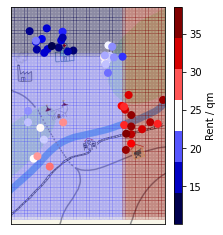

In [27]:
import matplotlib

img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None